# K-Modes

In [1]:
%store -r final
%store -r PC_scores

In [22]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from kmodes.kmodes import KModes
from matplotlib import colors
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import KElbowVisualizer


cmap = colors.ListedColormap(["#fffd7a", "#fcd421", "#ff950a", "#66baac", "#066159", "#011212"])
pal = ["#fffd7a", "#fcd421", "#ff950a", "#66baac", "#066159"]

In [13]:
PC_scores

,PC1,PC2,PC3
0,5.082694,0.230153,-1.819318
1,-2.923576,-0.142938,-0.187213
2,2.688929,0.778103,-0.605453
3,-2.750252,1.520266,-0.982516
4,-0.691867,-0.754350,0.657180
...,...,...,...
2090,-2.819348,1.473977,-1.316173
2091,2.430165,-2.306228,-2.202938
2092,2.677124,1.934550,-0.183826
2093,1.577544,-1.970691,1.447008


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning


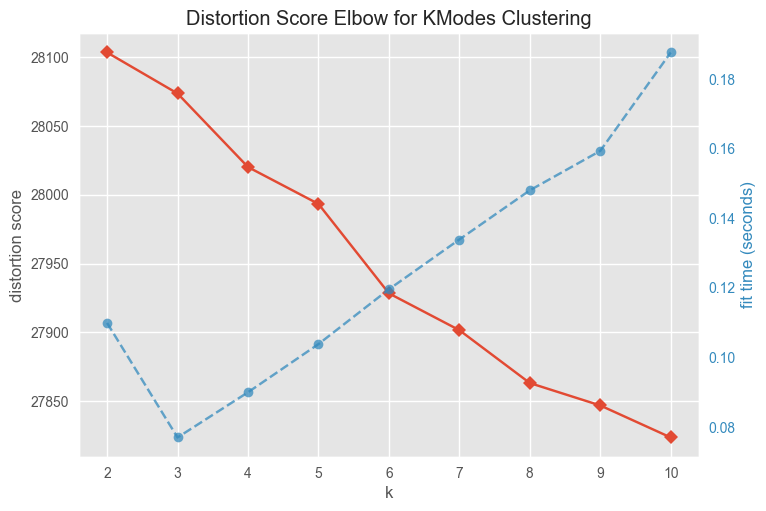

<Axes: title={'center': 'Distortion Score Elbow for KModes Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
Elbow_M = KElbowVisualizer(KModes())
Elbow_M.fit(PC_scores)
Elbow_M.show()

In [19]:
kmodes = KModes(n_clusters=6, init = "Cao", n_init = 1, verbose=1)
y_kmodes = kmodes.fit_predict(PC_scores)
X = np.array(PC_scores)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6228.0


In [20]:
y = pd.DataFrame(y_kmodes)
y.value_counts()

0    2080
1       3
2       3
3       3
4       3
5       3
dtype: int64

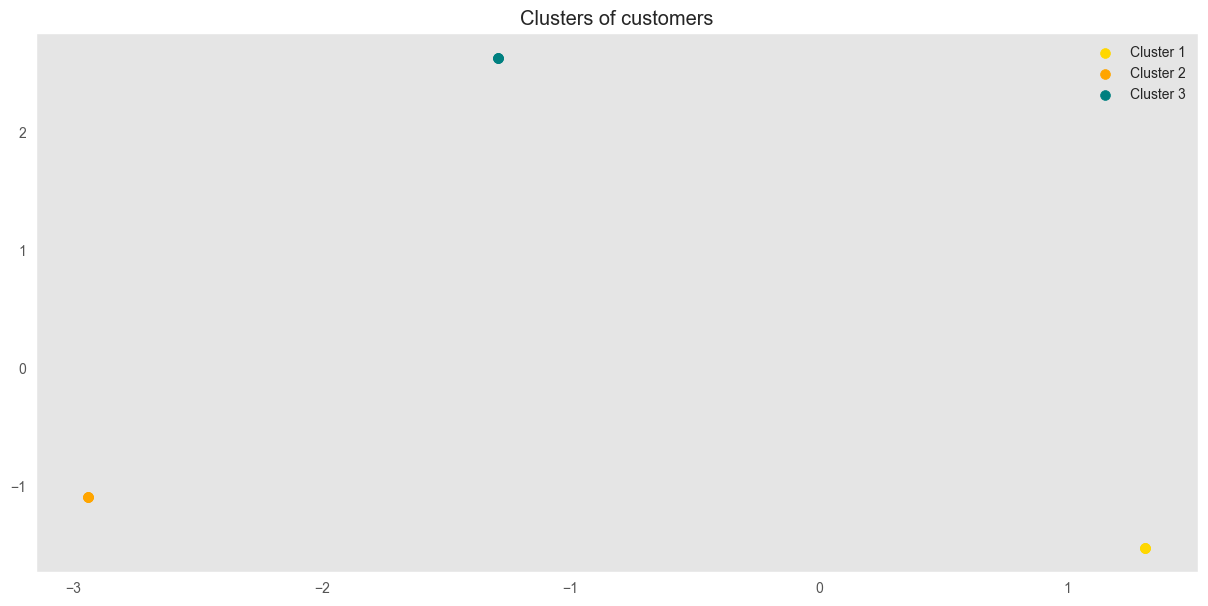

In [21]:
plt.figure(figsize=(15,7))
plt.scatter(X[y_kmodes == 1, 0], X[y_kmodes == 1, 1], color = 'gold', label = 'Cluster 1',s=50)
plt.scatter(X[y_kmodes == 2, 0], X[y_kmodes == 2, 1], color = 'orange', label = 'Cluster 2',s=50)
plt.scatter(X[y_kmodes == 4, 0], X[y_kmodes == 4, 1], color = 'teal', label = 'Cluster 3',s=50)
plt.grid(False)
plt.title('Clusters of customers')
plt.legend()
plt.show()